Створіть повний проект по Data Science: від збору даних до побудови моделі.

Джерело даних та ціль прогнозної моделі вибираєте самостійно. Бажано вибрати якусь корисну задачу, для якої можна було б знайти застосування в реальному житті. Краще вибрати нове джерело даних. Але на крайній випадок можна взяти дані з Проетів 1 чи 2.

Він має включати такі основні кроки:
збір даних з різних джерел
збереження цих даних (база даних, csv-файли і т.п.)
попередня обробка даних (якщо потрібно)
попередній (статистичний) аналіз даних
візуалізація даних (зазвичай відбувається паралельно з попереднім пунктом)
побудова прогнозної моделі на основі алгоритмів машинного навчання
оцінка якості моделі та короткі висновки.
Роботу виконуйте в Юпітер ноутбуках.
А також підготуйте коротку презентацію. Для цього у нас заплановане окреме заняття.

## Задача

Медицинская страховая компания опубликовала данные почти 1000 клиентов. Создайте модель, которая прогнозирует ежегодную стоимость медицинского покрытия. Данные добровольно предоставляются клиентами.

Содержание

Набор данных содержит параметры, связанные со здоровьем клиентов. Используйте их для создания модели, а также для выполнения EDA(анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации) на том же самом.
Премиальная цена указана в индийских рупиях (₹) и показывает цены на весь год.

Помогите решить важную финансовую проблему, которая может затронуть многих людей и помочь им принимать более взвешенные решения.

[Более подробную информацию о данных можно получить здесь](https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction)

* Age -возраст клиента
* Diabetes - Есть ли у клиента аномальный уровень сахара в крови
* BloodPressureProblems - Есть ли у клиента аномальный уровень артериального давления
* AnyTransplants - Любые крупные трансплантации органов
* Height - рост клиента
* Weight - вес клиента
* KnownAllergies - Есть ли у клиента известные аллергии 
* HistoryOfCancerInFamily - Была ли у кого-либо из кровных родственников клиента какая-либо форма рака
* NumberOfMajorSurgeries - Количество серьезных операций, которые перенес клиент
* PremiumPrice - цена на страховку клиента

In [328]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [329]:
df=pd.read_csv('Medicalpremium.csv')

In [330]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


Как видим, все наши данные числовые, пропусков нет,что хорошо для построения модели. 
Посмотрим основные описательные статистики для наших данных.

In [332]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


Посмотрим попарные scater plots для 4х признаков

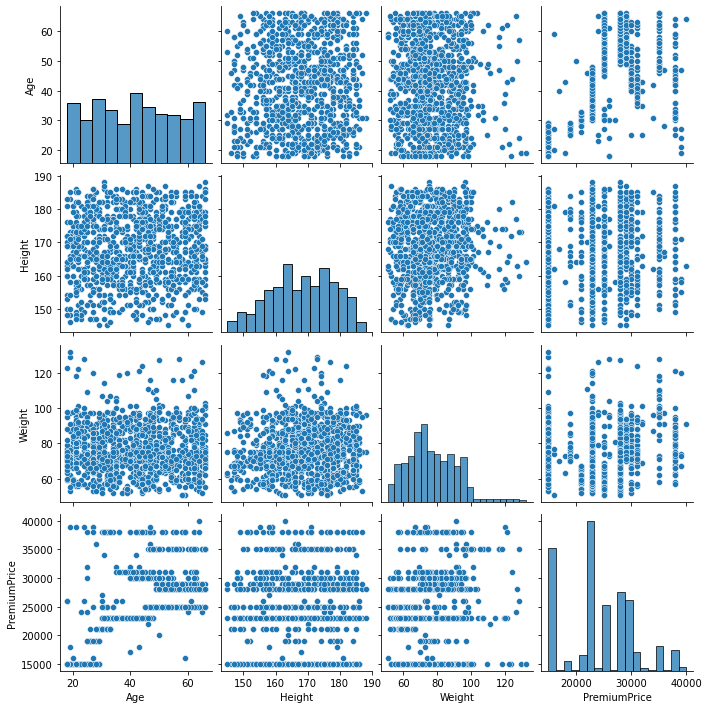

In [333]:
sns.pairplot(df,vars=['Age','Height','Weight','PremiumPrice'])

Построим тепловую карту и выведем значения корреляций для каждой переменной.

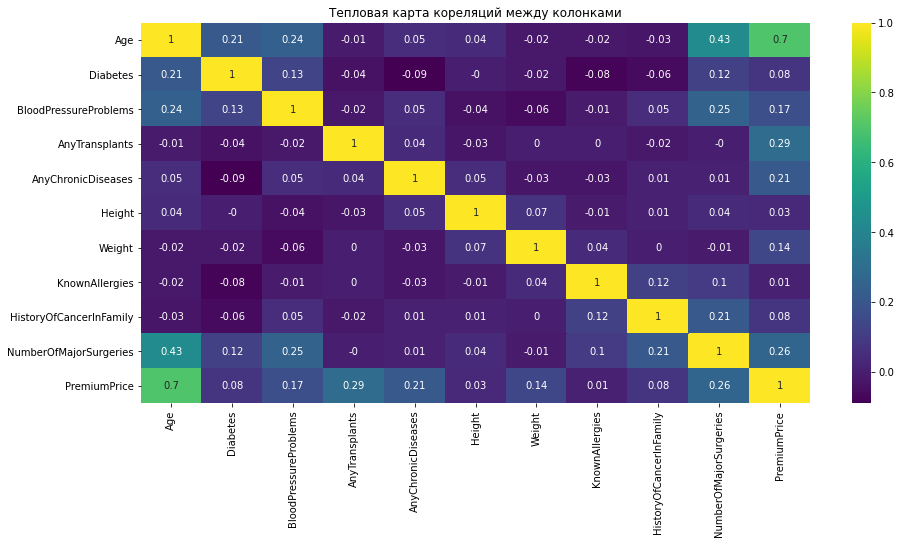

In [334]:
fig, axes = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
plt.title("Тепловая карта кореляций между колонками")
plt.show()

Как видно, наибольшую кореляцию целевая переменная имеет с возрастом(0,7), наименьшую - с алергией(0,01).


<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

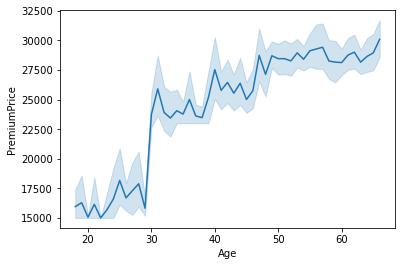

In [335]:
sns.lineplot(x=df.Age,y=df.PremiumPrice)

Попробуем постороить разные модели для прогнозирования нашей целевой переменной.
Для этого создадим функцию, которая будет тренировать наши данные с помощью нескольких моделей и выводить оценку точности для выбора оптимальной.

In [336]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_percentage_error
 

In [337]:
def different_models(X_train1, X_test1, y_train1, y_test1):

    models = {
        'Linear Regression':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'RandomForest':RandomForestRegressor(n_estimators=1000,random_state=1),
        'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=1000,random_state=1),
        'XGBRFRegressor':XGBRFRegressor()
         }
    for k,m in models.items():
        
        m.fit(X_train1,y_train1)
        y_pred = m.predict(X_test1)
        y_pred_train=m.predict(X_train1)
    
        print(f"Оценка точности для {k}:")
    
        print("Коэфициент детерминации:",(m.score(X_test1,y_test1)*100),"%")
        print("Погрешность для тренировочных данных:",mean_absolute_percentage_error(y_train1, y_pred_train) * 100)
        print("Погрешность для тестовых данных:",mean_absolute_percentage_error(y_test1, y_pred) * 100,end="\t")
        
#       сравним графики реальных и прогнозных значений
        x_ax = range(len(y_test1))
        plt.plot(x_ax, y_test1, label="original")
        plt.plot(x_ax, y_pred, label="predicted")
        plt.title("Insurance test and predicted data")
        plt.legend()
        plt.show()
               

In [338]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 

Оценка точности для Linear Regression:
Коэфициент детерминации: 61.03687160718126 %
Погрешность для тренировочных данных: 11.475086143504251
Погрешность для тестовых данных: 11.234460736946021	

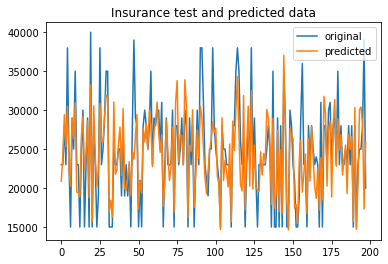

Оценка точности для Lasso:
Коэфициент детерминации: 61.023526734104 %
Погрешность для тренировочных данных: 11.474409996330188
Погрешность для тестовых данных: 11.233813161802091	

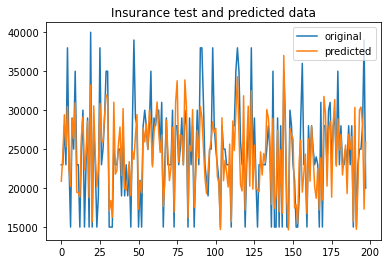

Оценка точности для Ridge:
Коэфициент детерминации: 60.89770165434156 %
Погрешность для тренировочных данных: 11.474669019351548
Погрешность для тестовых данных: 11.244342634515332	

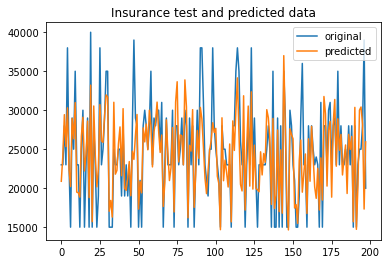

Оценка точности для RandomForest:
Коэфициент детерминации: 68.31416922317541 %
Погрешность для тренировочных данных: 1.6782979344589062
Погрешность для тестовых данных: 5.088783721435202	

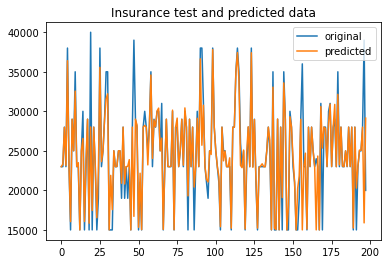

Оценка точности для GradientBoostingRegressor:
Коэфициент детерминации: 68.4319289068348 %
Погрешность для тренировочных данных: 2.232093640605402
Погрешность для тестовых данных: 6.576904641217516	

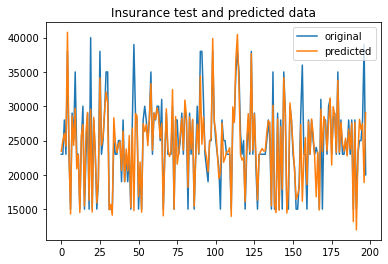

Оценка точности для XGBRFRegressor:
Коэфициент детерминации: 66.30956194572536 %
Погрешность для тренировочных данных: 3.712504472215561
Погрешность для тестовых данных: 6.220409223816213	

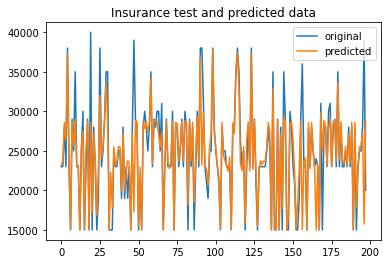

In [339]:
different_models(X_train, X_test, y_train, y_test)

Как видим исходя из полученных результатов наибольшую точность в сравнении с другими показывает модель GradientBoostingRegressor. Но для построения качественного прогноза этой точности недостаточно.
Попробуем это исправить.

Для этого создадим новые категориальные столбцы для цены, возраста, веса и роста клиентов. Разделим их на 5 типов: 'Low','Basic','Average','High','SuperHigh'

In [340]:
class_values=['Low','Basic','Average','High','SuperHigh']

df['Price_Class']=pd.cut(df['PremiumPrice'],bins=5,labels=class_values,precision=0)
df['Age_Class']=pd.cut(df['Age'],bins=5,labels=class_values,precision=0)
df['Weight_Class']=pd.cut(df['Weight'],bins=5,labels=class_values,precision=0)
df['Height_Class']=pd.cut(df['Height'],bins=5,labels=class_values,precision=0)
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Price_Class,Age_Class,Weight_Class,Height_Class
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average


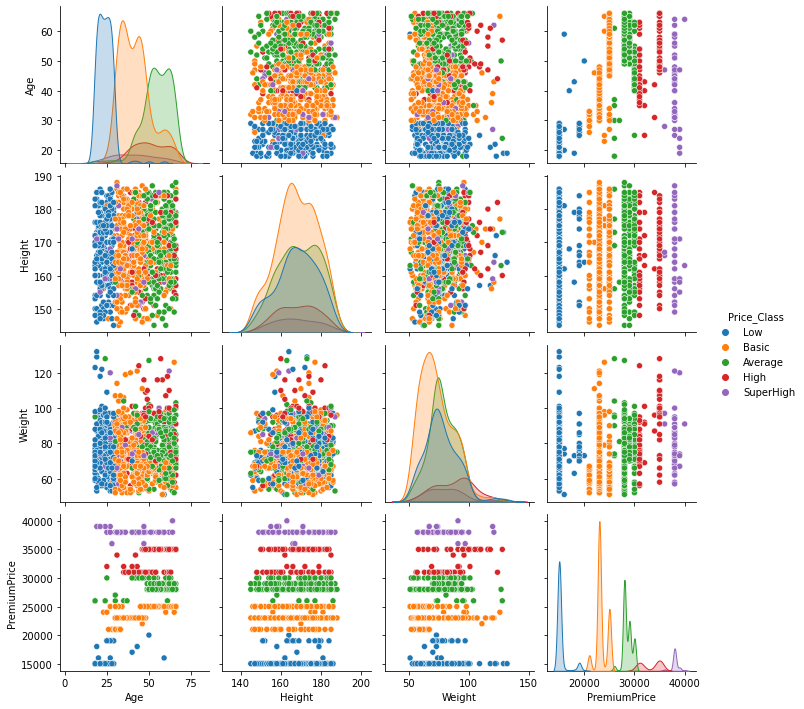

In [341]:
sns.pairplot(df,vars=['Age','Height','Weight','PremiumPrice'],hue='Price_Class')

<AxesSubplot:xlabel='Price_Class', ylabel='count'>

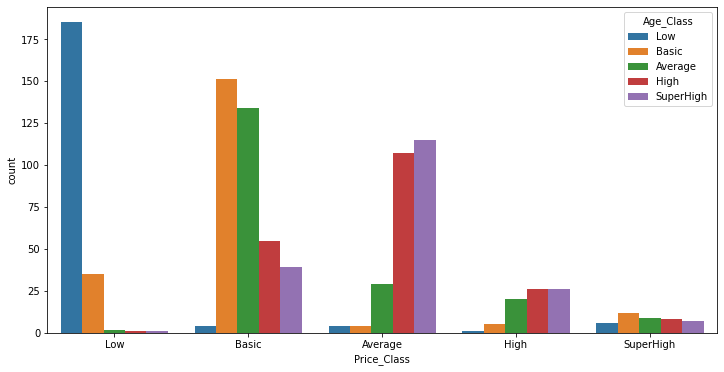

In [342]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='Price_Class',hue='Age_Class',data=df,ax=ax)

Переведем наши новые категориальные переменные в индикаторные числовые переменные

In [343]:
df=pd.get_dummies(data=df,columns=['Age_Class','Height_Class','Weight_Class','Price_Class'])

Теперь снова попробуем построить несколько моделей и выберем ту, которая покажет наилучший результат.

In [344]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Оценка точности для Linear Regression:
Коэфициент детерминации: 97.74958940652083 %
Погрешность для тренировочных данных: 2.62794269508606
Погрешность для тестовых данных: 2.7111970631465936	

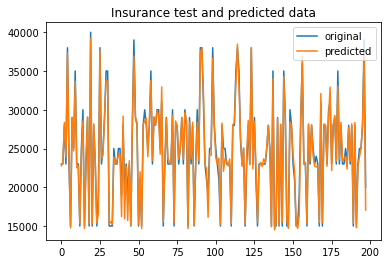

Оценка точности для Lasso:
Коэфициент детерминации: 97.75288816975936 %
Погрешность для тренировочных данных: 2.626250529726937
Погрешность для тестовых данных: 2.7090000286310256	

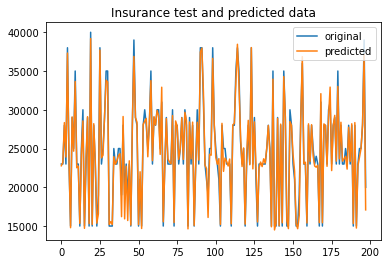

Оценка точности для Ridge:
Коэфициент детерминации: 97.71626449797888 %
Погрешность для тренировочных данных: 2.67995632909548
Погрешность для тестовых данных: 2.743537744922084	

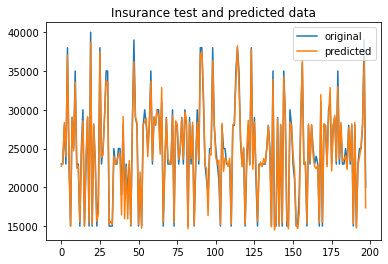

Оценка точности для RandomForest:
Коэфициент детерминации: 99.51200915005374 %
Погрешность для тренировочных данных: 0.17426572906387058
Погрешность для тестовых данных: 0.37102189603486324	

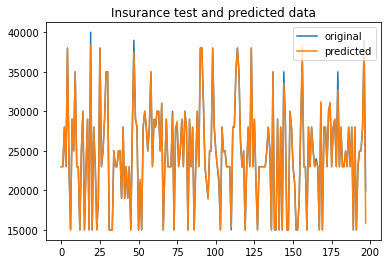

Оценка точности для GradientBoostingRegressor:
Коэфициент детерминации: 99.29272657500651 %
Погрешность для тренировочных данных: 0.22868839938893717
Погрешность для тестовых данных: 0.9287047581936668	

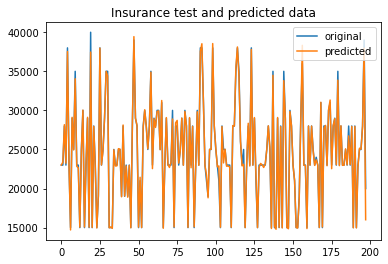

Оценка точности для XGBRFRegressor:
Коэфициент детерминации: 99.45037728903236 %
Погрешность для тренировочных данных: 0.37248906412870775
Погрешность для тестовых данных: 0.5454783726958776	

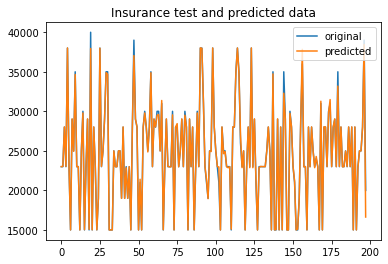

In [345]:
different_models(X_train, X_test, y_train, y_test)

Как видим преобразование нескольких признаковов в кактегориальные с последующим переводом в числовые индикаторные переменные существенно улучшило качество нашего прогноза.Все наши модели показали достаточно хороший результат. Самый точный прогноз дает модель "случайного леса". Но модель работает дольше чем модели регрессии.